# NOTEBOOK TO PERFORM FREQUENCY DISTRIBUTION ANALYSIS OVER THE DATA (BOTH WHOLE DATASET AND IMMIGRATION-RELATED TWEETS)

In [1]:
import spacy
import it_core_news_sm

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

/tmp/ipykernel_23730/100911439.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## LOAD THE DATA

In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,tweet
0,"Il “governo ammucchiata”, tutti insieme con PD..."
1,".@VittorioSgarbi: ""Verrà un tempo in cui Conte..."
2,🇮🇹🇮🇹🇮🇹 https://t.co/OO047uCKTN
3,"Un commosso addio a Roberto Brivio, artista in..."
4,Fiducia in questo Parlamento? NO Fiducia negli...
...,...
46419,Al mercato di via Ettore Ponti http://yfrog....
46420,Sl mercato di via de Guarnieri Milano...
46421,al mercato di via Osoppo a Milano. Se volete r...
46422,www.immaginami.it


In [3]:
!pip install stop-words
from stop_words import get_stop_words
italian_stop_words = get_stop_words('italian')


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


## TOKENIZE AND REMOVE STOP WORDS

In [4]:
nlp = spacy.load("it_core_news_sm")

# Tokenize the tweets with hashtags
tokenized_tweets = []
for tweet in df['tweet']:
    doc = nlp(tweet)
    tokenized_tweet = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in italian_stop_words and not token.is_punct]
    tokenized_tweets.append(tokenized_tweet)


#now i need a list of all the tokens in the tweets

all_tokens = []
for tweet in tokenized_tweets:
    for token in tweet:
        all_tokens.append(token)

In [5]:
#Here we create a dictionary with the frequency of each token and visualize the 20 most common tokens

FreqDict = Counter(all_tokens)    # italiani, immigrati, immigrazione, clandestini, sbarchi, primagliitaliani
FreqDict.most_common(150)

[('salvini', 16745),
 ('lega', 5769),
 ('italia', 4272),
 ('italiani', 3915),
 ('governo', 3422),
 ('amici', 3096),
 ('live', 2554),
 ('oggi', 2379),
 ('grazie', 2324),
 ('diretta', 2155),
 ('ore', 2117),
 ('renzi', 2071),
 ('ora', 2065),
 ('anni', 1824),
 ('solo', 1817),
 ('lavoro', 1795),
 ('pd', 1740),
 ('europa', 1665),
 ('fa', 1547),
 ('casa', 1531),
 ('portaaporta', 1485),
 ('paese', 1469),
 ('prima', 1428),
 ('sempre', 1301),
 ('stato', 1297),
 ('immigrati', 1281),
 ('roma', 1260),
 ('sinistra', 1243),
 ('piazza', 1233),
 ('milano', 1213),
 ('euro', 1204),
 ('dopo', 1195),
 ('essere', 1171),
 ('domenica', 1164),
 ('bene', 1126),
 ('sicurezza', 1094),
 ('fatto', 1067),
 ('clandestini', 1064),
 ('poi', 1056),
 ('cittadini', 1047),
 ('milioni', 1014),
 ('tasse', 1009),
 ('meno', 1003),
 ('tutta', 984),
 ('via', 981),
 ('domani', 975),
 ('ministro', 972),
 ('onda', 955),
 ('mai', 946),
 ('può', 945),
 ('qualcuno', 935),
 ('cosa', 934),
 ('legge', 918),
 ('avanti', 907),
 ('immigrazi

# PLOT THE 50 MOST COMMON UNIGRAMS IN THE WHOLE DATASET

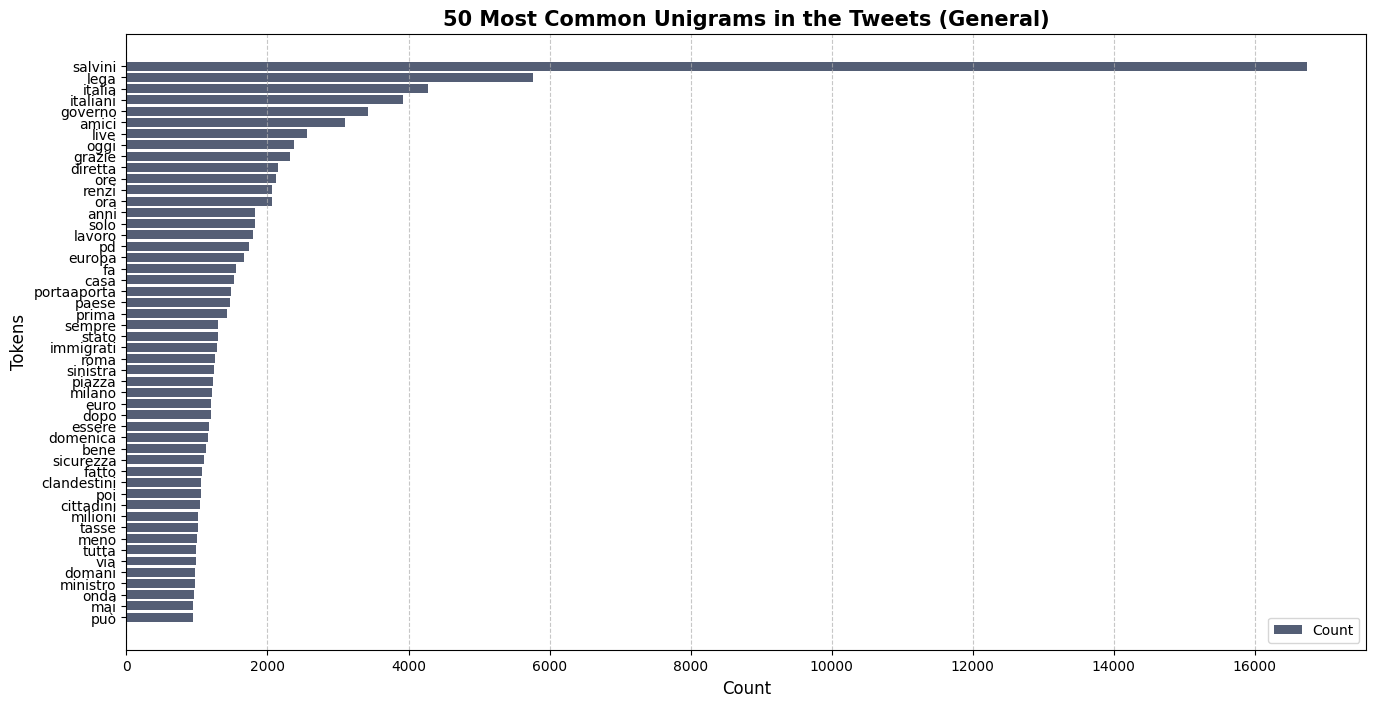

In [6]:
# Create a graph with the 50 most common tokens on the y-axis and the frequency count on the x-axis

# Extract the 50 most common tokens
most_common_tokens = FreqDict.most_common(50)

# Extract words and their frequencies
words = [word for word, _ in most_common_tokens]
frequencies = [freq for _, freq in most_common_tokens]

# Reverse the order of words and frequencies
words.reverse()
frequencies.reverse()

# Plot the 50 most common tokens
plt.figure(figsize=(16, 8))
plt.barh(words, frequencies, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Unigrams in the Tweets (General)', fontsize=15, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tokens', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.savefig('50_most_common_unigrams_general.png', dpi=300, bbox_inches='tight')
plt.show()


## EXTRACT BIGRAMS AND TRIGRAMS

In [7]:
# Extract bigrams and trigrams
bigrams = list(zip(all_tokens, all_tokens[1:]))
trigrams = list(zip(all_tokens, all_tokens[1:], all_tokens[2:]))

# Calculate frequencies
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

#the 10 most frequent bigrams

bigram_freq.most_common(100)  # immigrazione clandestina, prima italiani, primagliitaliani salvini,

[(('salvini', 'lega'), 1481),
 (('portaaporta', 'salvini'), 1082),
 (('ore', 'trasmissione'), 587),
 (('ottoemezzo', 'salvini'), 574),
 (('trasmissione', 'tv'), 529),
 (('tv', 'onda'), 522),
 (('forze', 'ordine'), 501),
 (('ora', 'diretta'), 411),
 (('tutta', 'italia'), 341),
 (('milioni', 'italiani'), 330),
 (('quartarepubblica', 'salvini'), 325),
 (('dimartedi', 'salvini'), 323),
 (('lega', 'salvini'), 320),
 (('legge', 'fornero'), 293),
 (('quintacolonna', 'salvini'), 277),
 (('ore', 'incontro'), 277),
 (('domenica', 'ore'), 264),
 (('buongiorno', 'amici'), 258),
 (('roba', 'matti'), 256),
 (('donne', 'uomini'), 247),
 (('salvini', 'renzi'), 245),
 (('video', 'completo'), 244),
 (('nonelarena', 'salvini'), 243),
 (('nonstopnews', 'salvini'), 242),
 (('salvini', 'italia'), 241),
 (('avanti', 'tutta'), 241),
 (('iovotono', 'salvini'), 241),
 (('fuoridalcoro', 'salvini'), 238),
 (('immigrazione', 'clandestina'), 236),
 (('venerdì', 'ore'), 233),
 (('centri', 'sociali'), 232),
 (('incon

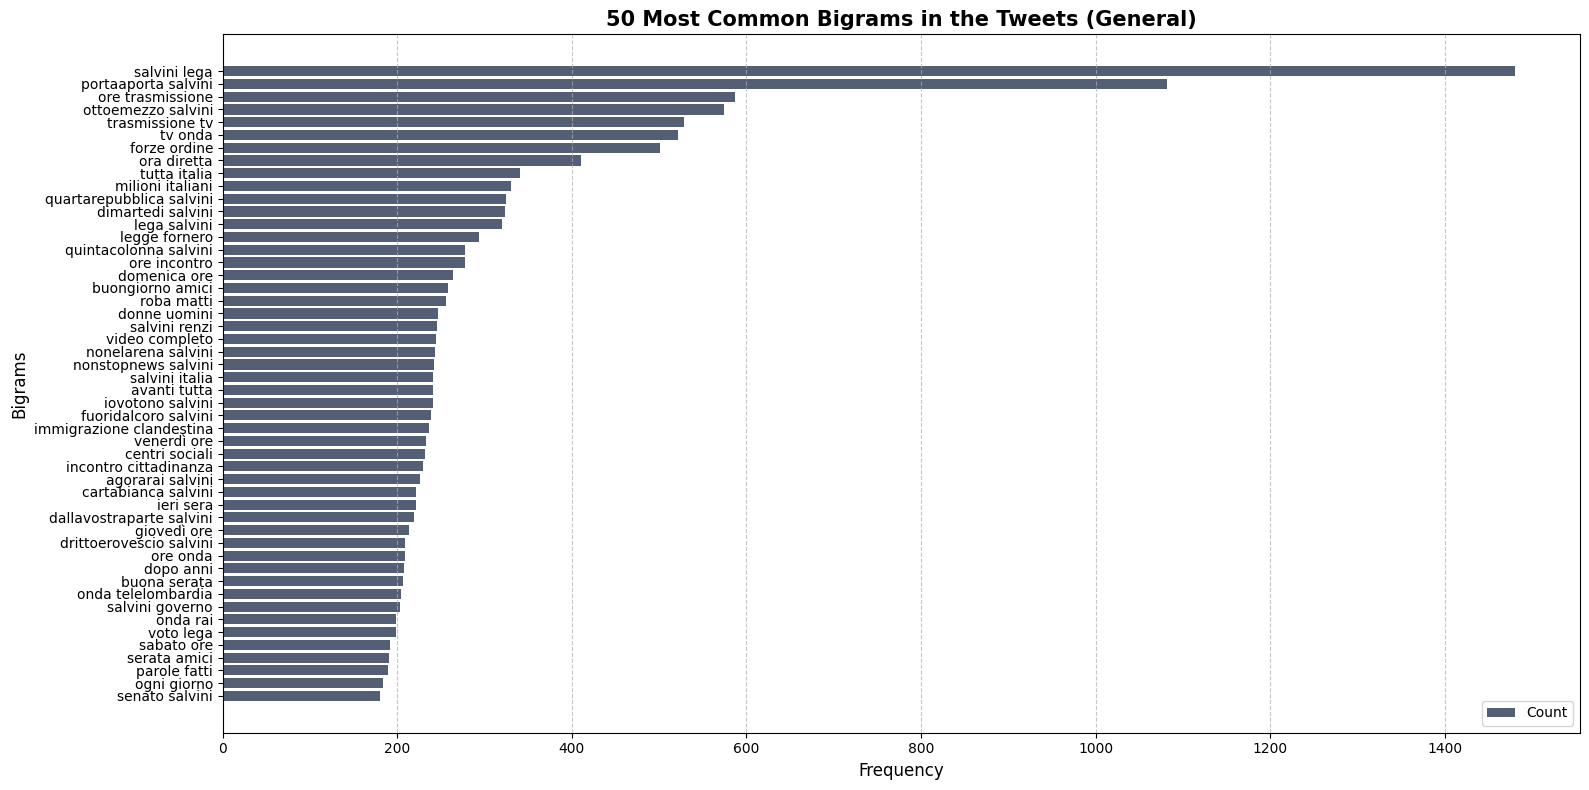

In [8]:
# Extract bigram words and their frequencies"""

bigram_words = [f"{word1} {word2}" for (word1, word2), freq in bigram_freq.most_common(50)]
bigram_frequencies = [freq for (_, _), freq in bigram_freq.most_common(50)]

bigram_words.reverse()
bigram_frequencies.reverse()

# Plot the 50 most common bigrams

plt.figure(figsize=(16, 8))
plt.barh(bigram_words, bigram_frequencies, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Bigrams in the Tweets (General)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_bigrams_general.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# 10 most frequent trigrams

trigram_freq.most_common(100)  # business immigrazione clandestina, reato immigrazione clandestina, campo profughi europa

[(('ore', 'trasmissione', 'tv'), 527),
 (('trasmissione', 'tv', 'onda'), 520),
 (('ore', 'incontro', 'cittadinanza'), 205),
 (('buona', 'serata', 'amici'), 181),
 (('stavolta', 'voto', 'lega'), 151),
 (('tv', 'onda', 'telelombardia'), 147),
 (('voto', 'lega', 'salvini'), 142),
 (('venerdì', 'ore', 'trasmissione'), 140),
 (('notte', 'serena', 'amici'), 118),
 (('lunedì', 'ore', 'trasmissione'), 114),
 (('telelombardia', 'orario', 'continuato'), 113),
 (('telelombardia', 'buongiorno', 'lombardia'), 108),
 (('buona', 'giornata', 'amici'), 107),
 (('giovedì', 'ore', 'trasmissione'), 103),
 (('onda', 'telelombardia', 'buongiorno'), 99),
 (('mercoledì', 'ore', 'trasmissione'), 98),
 (('buona', 'domenica', 'amici'), 97),
 (('tv', 'onda', 'rai'), 95),
 (('buon', 'pomeriggio', 'amici'), 94),
 (('donne', 'uomini', 'divisa'), 84),
 (('ore', 'festa', 'ln'), 83),
 (('onda', 'telelombardia', 'orario'), 81),
 (('grazie', 'forze', 'ordine'), 79),
 (('domenica', 'ore', 'votare'), 79),
 (('ore', 'votare

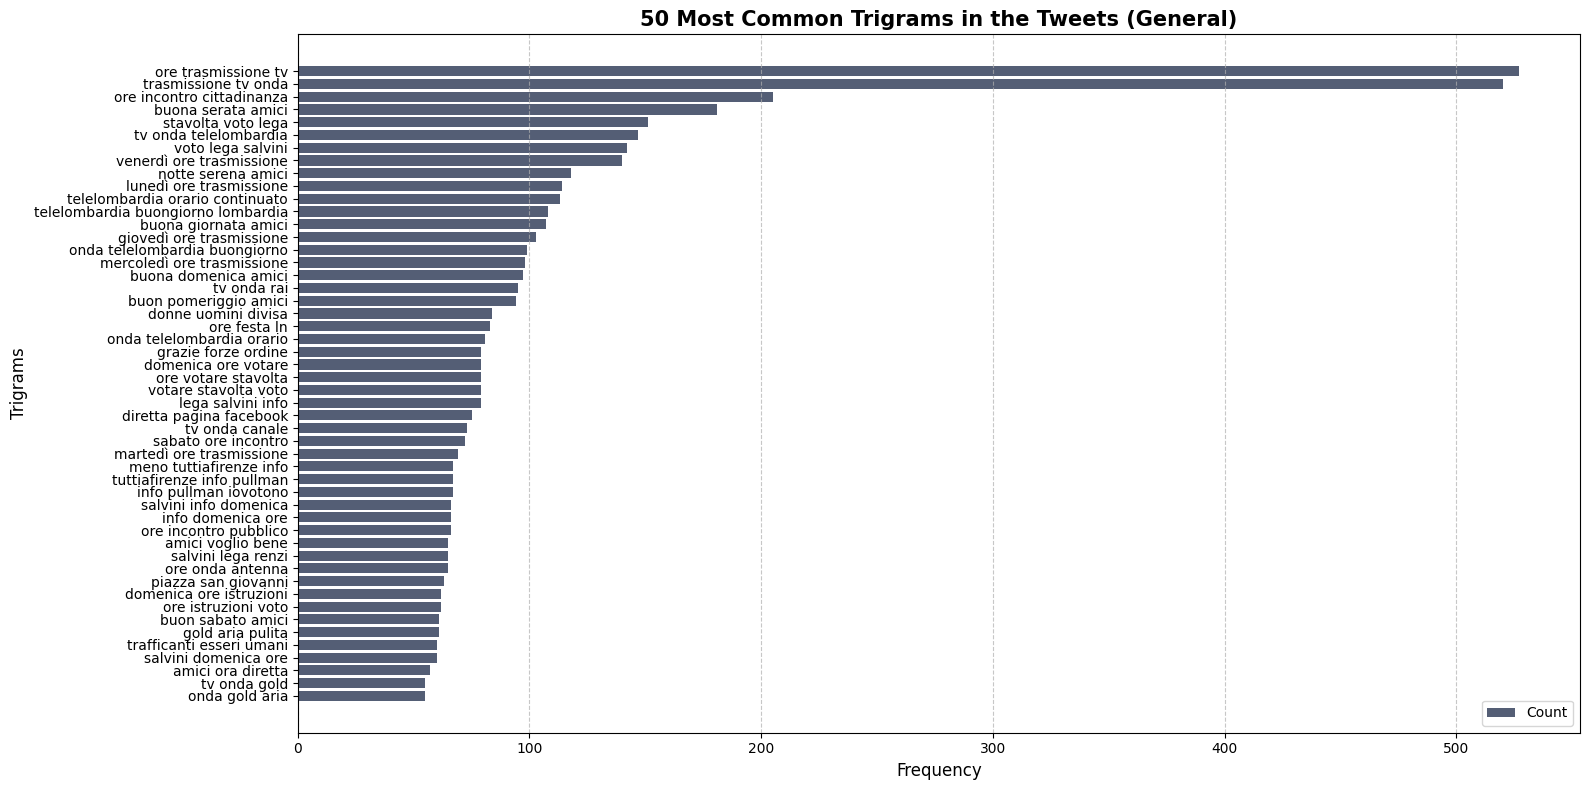

In [10]:
# Extract trigram words and their frequencies
trigram_words = [f"{word1} {word2} {word3}" for (word1, word2, word3), freq in trigram_freq.most_common(50)]
trigram_frequencies = [freq for (_, _, _), freq in trigram_freq.most_common(50)]

trigram_words.reverse()
trigram_frequencies.reverse()

# Plot the 50 most common trigrams
plt.figure(figsize=(16, 8))
plt.barh(trigram_words, trigram_frequencies, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Trigrams in the Tweets (General)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_trigrams_general.png', dpi=300, bbox_inches='tight')
plt.show()

# Let’s check now the most frequent bigrams and trigrams in our relevant tweets (those who are in the topics)

In [11]:
relevant_tweets = pd.read_csv('all_topics.csv')

relevant_tweets

,Doc,Topic,Doc_ID
0,Centinaia di italiani che vivono e lavorano a ...,122,463
1,Il governo ha bloccato il Parlamento per aprir...,122,728
2,⚠️Divieto di spostamento tra regioni dal 20 di...,122,858
3,#Salvini: Ancora troppi gli italiani dimentica...,122,1057
4,Vedendo quanto sta accadendo ora grazie a Cont...,122,1068
...,...,...,...
1534,L'intervento in Libia ha peggiorato la situazi...,123,37493
1535,"Sul Corriere denuncia di Tripoli: ""Sbarchi dal...",123,37763
1536,Altri 556 immigrati raccolti da navi militari ...,123,38238
1537,Le cosche guadagnano sugli #immigrati: marina ...,123,38256


## TOKENIZE AND REMOVE STOP WORDS

In [12]:
tokenized_relevant_tweets = []
for tweet in relevant_tweets['Doc']:
    doc = nlp(tweet)
    tokenized_relevant_tweet = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in italian_stop_words and not token.is_punct]
    tokenized_relevant_tweets.append(tokenized_relevant_tweet)



#list of all the tokens in the tweets

all_tokens_relevant = []
for tweet in tokenized_relevant_tweets:
    for token in tweet:
        all_tokens_relevant.append(token)

## CREATE FREQUENCY DICTIONARIES

In [13]:
FreqDict_relevant = Counter(all_tokens_relevant)
FreqDict_relevant.most_common(20)

[('salvini', 715),
 ('immigrati', 416),
 ('immigrazione', 336),
 ('italia', 227),
 ('italiani', 206),
 ('lega', 150),
 ('sicilia', 141),
 ('profughi', 135),
 ('clandestini', 131),
 ('governo', 130),
 ('clandestina', 101),
 ('solo', 100),
 ('casa', 92),
 ('libia', 90),
 ('ong', 81),
 ('isis', 74),
 ('pd', 73),
 ('oggi', 73),
 ('nave', 72),
 ('palermo', 68)]

## PLOT THE 50 MOST COMMON UNIGRAMS IN THE IMMIGRATION-RELATED TWEETS

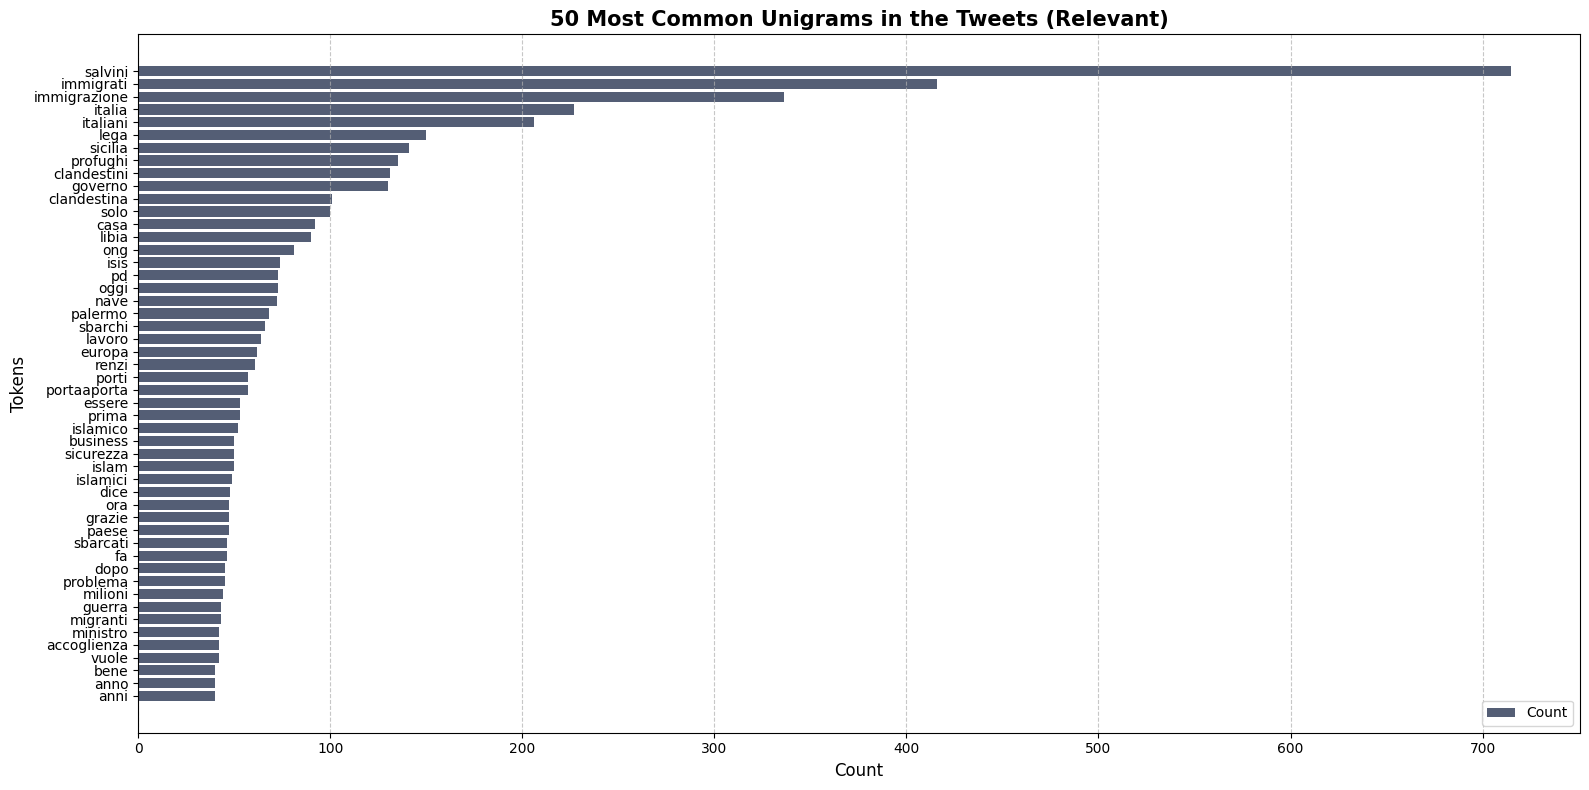

In [14]:
# Extract the 50 most common tokens
most_common_tokens_relevant = FreqDict_relevant.most_common(50)

# Extract words and their frequencies
words_relevant = [word for word, _ in most_common_tokens_relevant]
frequencies_relevant = [freq for _, freq in most_common_tokens_relevant]

# Reverse the order of words and frequencies
words_relevant.reverse()
frequencies_relevant.reverse()

# Plot the 50 most common tokens
plt.figure(figsize=(16, 8))
plt.barh(words_relevant, frequencies_relevant, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Unigrams in the Tweets (Relevant)', fontsize=15, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tokens', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()
plt.savefig('50_most_common_unigrams_relevant.png', dpi=300, bbox_inches='tight')
plt.show()


## COMPUTE BIGRAMS AND TRIGRAMS

In [15]:
bigrams_relevant = list(zip(all_tokens_relevant, all_tokens_relevant[1:]))
trigrams_relevant = list(zip(all_tokens_relevant, all_tokens_relevant[1:], all_tokens_relevant[2:]))

# Calculate frequencies
bigram_freq_relevant = Counter(bigrams_relevant)
trigram_freq_relevant = Counter(trigrams_relevant)

In [16]:
bigram_freq_relevant.most_common(100) 

[(('immigrazione', 'clandestina'), 97),
 (('salvini', 'lega'), 69),
 (('salvini', 'immigrazione'), 46),
 (('immigrati', 'regolari'), 34),
 (('business', 'immigrazione'), 30),
 (('portaaporta', 'salvini'), 28),
 (('nave', 'ong'), 25),
 (('immigrati', 'clandestini'), 24),
 (('campo', 'profughi'), 24),
 (('presunti', 'profughi'), 24),
 (('esseri', 'umani'), 22),
 (('terrorismo', 'islamico'), 21),
 (('salvini', 'immigrati'), 20),
 (('guardia', 'costiera'), 19),
 (('immigrati', 'bordo'), 18),
 (('reato', 'immigrazione'), 18),
 (('quintacolonna', 'salvini'), 18),
 (('costiera', 'libica'), 18),
 (('fuori', 'controllo'), 17),
 (('milioni', 'italiani'), 17),
 (('salvini', 'salvini'), 17),
 (('richiedenti', 'asilo'), 16),
 (('ottoemezzo', 'salvini'), 16),
 (('dallavostraparte', 'salvini'), 16),
 (('profughi', 'europa'), 15),
 (('ballarò', 'salvini'), 15),
 (('terroristi', 'islamici'), 15),
 (('porti', 'italiani'), 14),
 (('salvini', 'italia'), 14),
 (('ministro', 'interno'), 13),
 (('migliaia', 

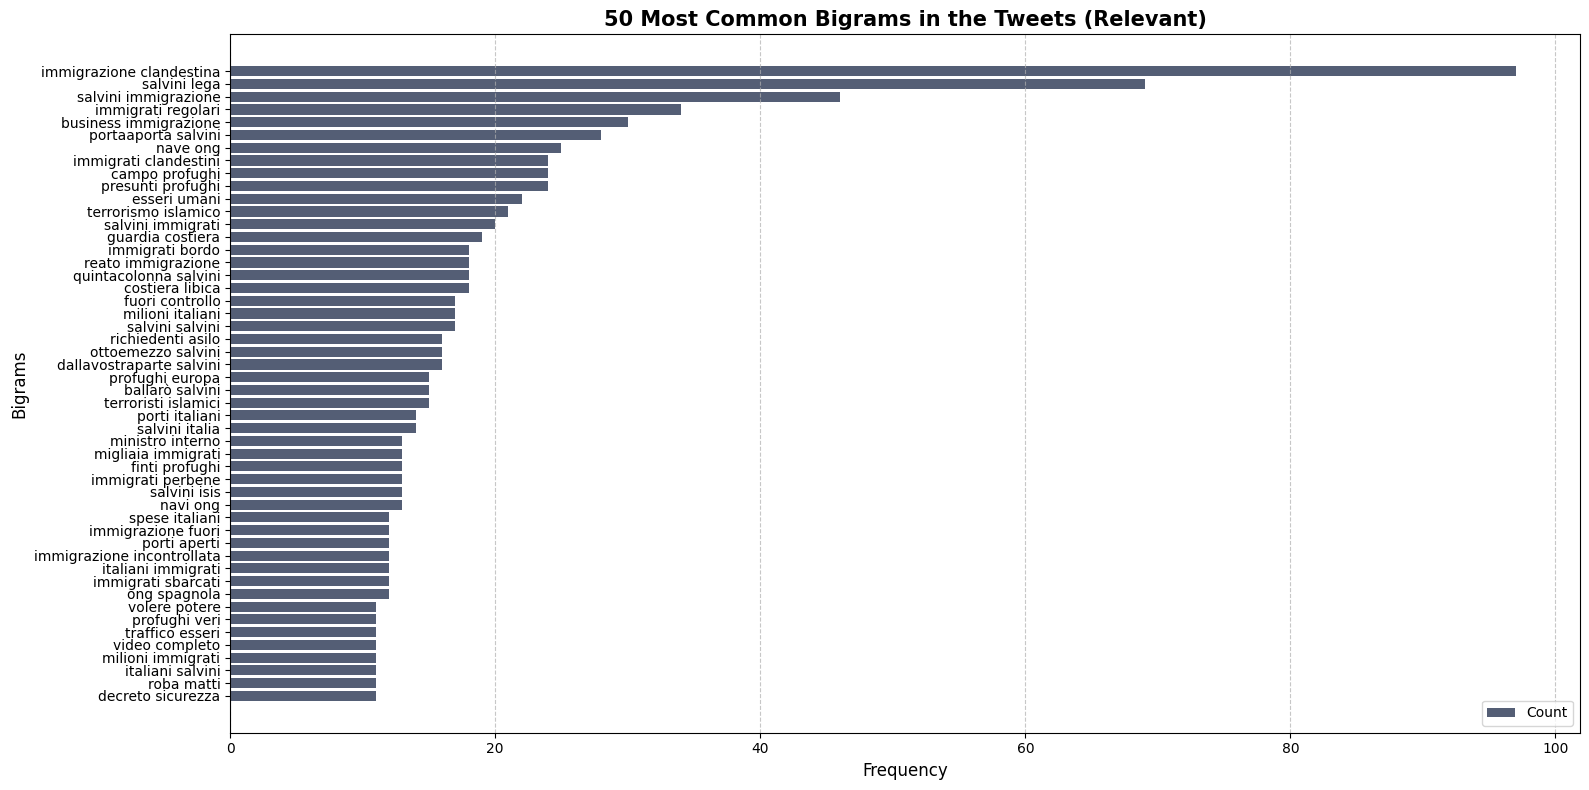

In [17]:
# Extract bigram words and their frequencies"""

bigram_words_rel = [f"{word1} {word2}" for (word1, word2), freq in bigram_freq_relevant.most_common(50)]
bigram_frequencies_rel = [freq for (_, _), freq in bigram_freq_relevant.most_common(50)]

bigram_words_rel.reverse()
bigram_frequencies_rel.reverse()

# Plot the 50 most common bigrams

plt.figure(figsize=(16, 8))
plt.barh(bigram_words_rel, bigram_frequencies_rel, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Bigrams in the Tweets (Relevant)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_bigrams_relevant.png', dpi=300, bbox_inches='tight')
plt.show()

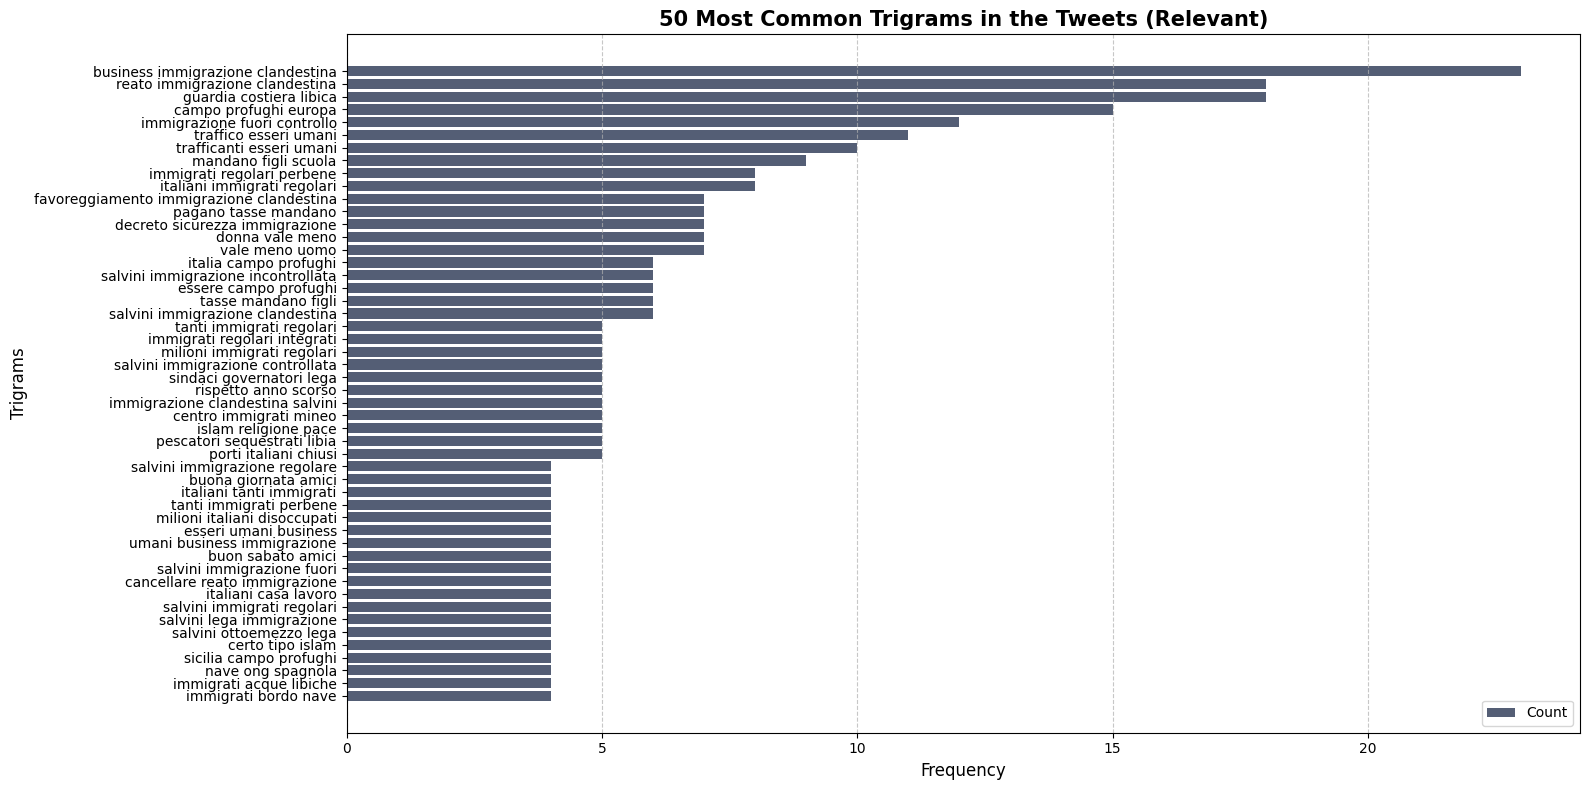

In [18]:
# Extract trigram words and their frequencies
trigram_words_rel = [f"{word1} {word2} {word3}" for (word1, word2, word3), freq in trigram_freq_relevant.most_common(50)]
trigram_frequencies_rel = [freq for (_, _, _), freq in trigram_freq_relevant.most_common(50)]

trigram_words_rel.reverse()
trigram_frequencies_rel.reverse()

# Plot the 50 most common trigrams
plt.figure(figsize=(16, 8))
plt.barh(trigram_words_rel, trigram_frequencies_rel, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Trigrams in the Tweets (Relevant)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_trigrams_relevant.png', dpi=300, bbox_inches='tight')
plt.show()